<img src="https://raw.githubusercontent.com/Qiskit/qiskit-tutorials/master/images/qiskit-heading.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# **Grover's Search Algorithm** 

### Contributors
Michele Grossi, Filippo Tramonto, Ennio Picarelli

## Application of the Grover's serach algorithm to 2 qubit system

Below is an example of an application with QISKIT of the Grover algorithm in the case of a search in a list of 4 items using 2 qubits.

__Tutorial outline:__

1) Import of the libraries

2) Initialization of the circuit

3) Hadamard Transform

4) Write a routine to ask to the user and request for input to set the chosen card

5) Starting from the assignment |00> --> Hearts |10> --> Paintings |01> --> Flowers |11> --> Spades, conditioned creation of Oracles with visualization of various circuits

<img src="cards.png" width="300">

6) Creation of the conditioned phase shift operator

7) Run with simulator

8) Run on real processor 

9) Print and plot the result 

**Some cells are hidden so you can implement your solution/answer and then check with the proposed solution**.

Code import
==========
## Let's load the necessary Qiskit libraries into the Python environment and initialize the circuit <a id='sectionB'></a>

The circuit is initialized to 2 qubits: q0 and q1

In [1]:
from hide_toggle import hide_toggle
#usage: 
#1 create a cell with: hide_toggle(for_next=True)
#2 put the commented solution in the next cell

In [2]:
#import latex
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
import numpy as np
%matplotlib inline

## Let's initialize the circuit<a id='sectionB'></a>

In [ ]:
#define a 2 qubit register and QuantumCircuit


In [3]:
hide_toggle(for_next=True)

In [3]:
# 2 bit registry creation.
qr = QuantumRegister(2, 'qr')

# Circuit creation 
qc = QuantumCircuit(qr)

# Let's build the superposition of all basis states

#### Let's build the Hadamard transform by applying the hadamard gates to the two qubits

In [ ]:
#solution:
#had_tr = QuantumCircuit(qr)

In [4]:
hide_toggle(for_next=True)

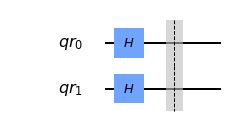

In [4]:
# Circuit creation of the Hadamard Transform
had_tr = QuantumCircuit(qr)

had_tr.h(qr[0])
had_tr.h(qr[1])
had_tr.barrier()


qc = had_tr
qc.draw(output='mpl')

We visualize the array of amplitudes after the superposition


In [ ]:
#run the circuit on statevector_simulator, save result to state_superposition variable

In [5]:
hide_toggle(for_next=True)

In [5]:
# execute the quantum circuit on simulator 
backend = BasicAer.get_backend('statevector_simulator')

job = execute(qc, backend)

state_superposition = job.result().get_statevector(qc)
print(state_superposition)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


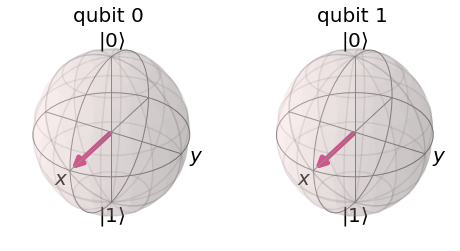

In [6]:
from qiskit.tools.visualization import plot_bloch_multivector

rho_superposition= np.outer(state_superposition, state_superposition.conj())
plot_bloch_multivector(rho_superposition)

## Lest's write a routine that asks the user for input to define the "card" he wants find.

In [18]:
print("\n\n\n\n===== Welcome! =====\n\n")
print("  ~~ Let's take this test ~~ ")
print("\n\n")
print("Select the winner among:")
print("a) Hearts")
print("b) Pictures")
print("c) Flowers")
print("d) Spades")
chosen = 0
while (chosen==0):
#	scelta = getpass.getpass("make your choise. (a, b, c, d, e or f)\n")
    scelta = input("Choose your card (a, b, c, d)\n")
    if scelta == "a":
        bit = "|00>"
        print("Choice: a) Hearts")
    if scelta == "b":
        bit = "|01>"
        print("Choice: b) Pictures")
    if scelta == "c":
        bit = "|10>"
        print("Choice: c) Flowers")
    if scelta == "d":
        bit = "|11>"
        print("Choice: d) Spades")
    if scelta in ["a","b","c","d"]:
        chosen = 1
        
        print ("Linked to:", bit)
    else:
        print("wrong selection, retry")





===== Welcome! =====


  ~~ Let's take this test ~~ 



Select the winner among:
a) Hearts
b) Pictures
c) Flowers
d) Spades
Choose your card (a, b, c, d)
a
Choice: a) Hearts
Linked to: |00>


# Let's build the oracle operator

### How implement the Oracle operator in a two qubit circuit?

We have 4 basis states, $|00 \rangle$, $|01 \rangle$, $|10 \rangle$, $|11 \rangle$, and we want to mark one of them by changing the sign.

#### Let's see how can change the sign of the state of 1 qubit.

For $|1 \rangle$ we can do it by applying $H$ and $X$ as follows:
$$ |1 \rangle \xrightarrow{H} \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) \xrightarrow{X} - \frac{1}{\sqrt{2}} ( |0\rangle - |1 \rangle)  \xrightarrow{H} - |1 \rangle $$

For $|0 \rangle$ we just add the $X$ operator before and after:
$$ |0\rangle \xrightarrow{X} |1 \rangle \xrightarrow{H} \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) \xrightarrow{X} - \frac{1}{\sqrt{2}} ( |0\rangle - |1 \rangle)  \xrightarrow{H} - |1 \rangle \xrightarrow{X} -|0\rangle $$

#### For two qubits...

Let's make the previous qubit as the second qubit and substitute the central  $X$  with a  $\mathrm{CNOT}$  controlled by the first qubit in the state $|1 \rangle$ :
$$ |1 \rangle |1 \rangle \xrightarrow{H} |1 \rangle \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) \xrightarrow{CNOT} - |1 \rangle \frac{1}{\sqrt{2}} ( |0\rangle - |1 \rangle)  \xrightarrow{H} - |1 \rangle |1 \rangle $$

If the first qubit is in the state $|0 \rangle$, just put a $X$ on it before the $\mathrm{CNOT}$ and another $X$ after the $\mathrm{CNOT}$ to reverse the state.

Let's draw the circuit of the oracle for the state $|11 \rangle$.

In [19]:
#create the circuit orac
#orac = QuantumCircuit(qr)

In [20]:
hide_toggle(for_next=True)

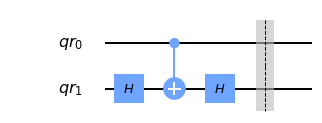

In [21]:
orac = QuantumCircuit(qr)

orac.h(qr[1])
orac.cx(qr[0],qr[1])
orac.h(qr[1])
orac.barrier()

orac.draw(output='mpl')

Let's put together with the Hadamard transform.

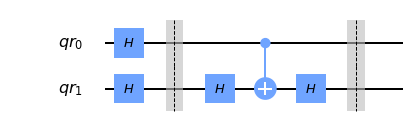

In [22]:
# The Qiskit circuit object supports concatenating circuits with the addition operator.

qc = had_tr + orac

qc.draw(output='mpl')

## We create an oracle for each searched card
In a list of if we create the Oracle function depending on the state we want find.

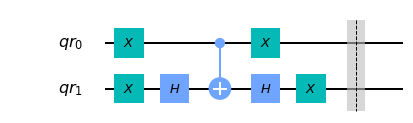

In [24]:
orac = QuantumCircuit(qr)

if scelta == "a": # |00>
    orac.x(qr[0])
    orac.x(qr[1])
    orac.h(qr[1])
    orac.cx(qr[0],qr[1])
    orac.h(qr[1])
    orac.x(qr[0])
    orac.x(qr[1])
    orac.barrier()

if scelta == "b": # |01>
    orac.x(qr[1])
    orac.h(qr[1])
    orac.cx(qr[0],qr[1])
    orac.h(qr[1])
    orac.x(qr[1])
    orac.barrier()

if scelta == "c": # |10>
    orac.x(qr[0])
    orac.h(qr[1])
    orac.cx(qr[0],qr[1])
    orac.h(qr[1])
    orac.x(qr[0])
    orac.barrier()

if scelta == "d":  # |11>
    orac.h(qr[1])
    orac.cx(qr[0],qr[1])
    orac.h(qr[1])
    orac.barrier()

orac.draw(output='mpl')

Let's intialize the circuit with the Hadamard transform

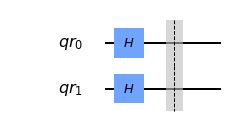

In [25]:
qc = had_tr
qc.draw(output='mpl')

Let's see the array of amplitudes, before applying the oracle operator

In [26]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)

state = job.result().get_statevector(qc)
state

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

Now let's apply the oracle and see the array of amplitudes after the oracle

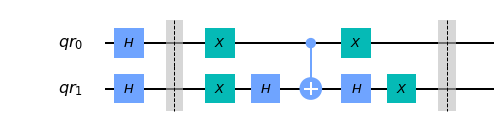

In [27]:
qc = had_tr + orac
qc.draw(output='mpl')

In [28]:
job = execute(qc, backend)

state = job.result().get_statevector(qc)
state

array([-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j])

Neglecting the null imaginary component we can conclude that after the Oracle only the chosen "card" has reversed sign

## Let's create the operator $2 | 0 \rangle \langle 0 | -I $  (conditioned phase shift)

We have to build an operator $U$ that let's unchanged  the state $| 00 \rangle$ and change the sign of the other basis states, but if we build the opposite operator $V=-U$ this change only the global phase that doesn't affect the result of the measurement.

So let's build the opposite operator that changes the sign of $| 00 \rangle$ and let unchanged the other state. We have already seen this operator...

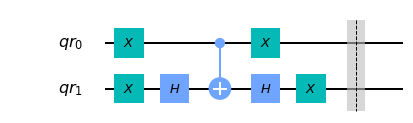

In [29]:
cphase = QuantumCircuit(qr)

cphase.x(qr[0])
cphase.x(qr[1])

cphase.h(qr[1])
cphase.cx(qr[0],qr[1])
cphase.h(qr[1])

cphase.x(qr[0])
cphase.x(qr[1])
cphase.barrier()

qc = cphase

qc.draw(output='mpl')

#### Let's put all togheter

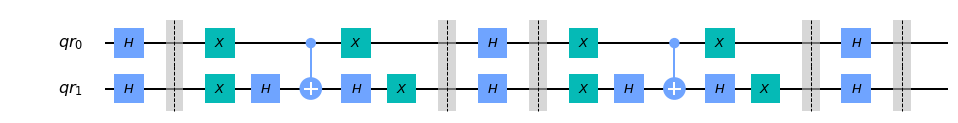

In [30]:
qc = had_tr + orac + had_tr + cphase + had_tr

qc.draw(output='mpl')

#### Let's complete the circuit with the measurements

In [ ]:
#solution:
#add classical bit register and meas, draw the circuit

In [7]:
hide_toggle(for_next=True)

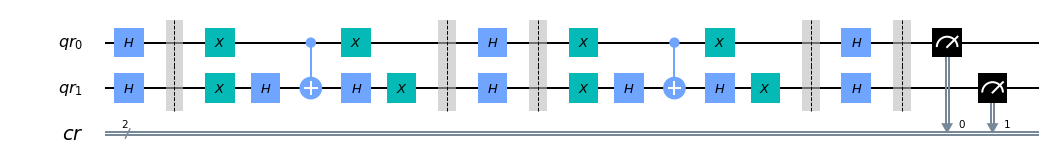

In [31]:
# Create a Classical Register with 2 bits.
cr = ClassicalRegister(2, 'cr')
# Create a Quantum Circuit
meas = QuantumCircuit(qr, cr)

# add measurement operators
meas.measure(qr,cr)

qc = had_tr + orac + had_tr + cphase + had_tr + meas

#drawing the circuit
qc.draw(output='mpl')

## We run the circuit in the first instance with the simulator
We report the values found in measure 

In [ ]:
#solution:
#from qiskit import BasicAer
#...
#...
#print("Results : ", counts)

In [8]:
hide_toggle(for_next=True)

In [32]:
# Import Aer
from qiskit import BasicAer

# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job = execute(qc, backend_sim)

# Grab the results from the job.
result = job.result()

counts = result.get_counts(qc)
print("Results : ", counts)

Results :  {'00': 1024}


## Let's plot the histogram
We report the value identified and the occurrences in the set of readings

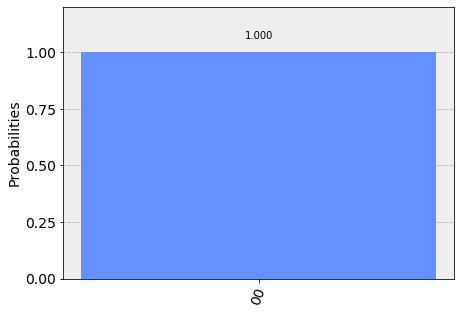

In [33]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## We run the circuit with the real processor <a id='sectionB'></a>
 The following is the sequence of necessary operations:
 
 a) we import IBMQ, i.e. the management libraries of the real processor
 
 b) we save (save_account function) our credentials obtained from the advanced functions of my account on IBM Q Experience
 
 c) we load (load_accounts) the credentials 
 
 d) we print the available backends (backends)
 
 e) from qiskit.backends.ibmq we import the function least_busy that allows to evaluate the optimal backend. We apply this function to the backends excluding the qasm simulator "devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 2 and not x.configuration()['simulator'])".
 
 f) we import all features from qiskit.wrapper.jupyter
 
 g) we set %%qiskit_job_status that will serve to visualize the ongoing of our job; then we set in a variable the number of shots and the maximum number of credits allowed; then we execute the job passing: circuit name, backend name, shot number, maximum credits number
 
 h) as above we put in result_real the measurements and make the plot
 

In [34]:
#1
from qiskit import IBMQ
#IBMQ.delete_accounts()
#IBMQ.save_account('API_TOKEN')

In [35]:
#2
provider = IBMQ.load_account()

In [ ]:
#3
#solution:

In [9]:
hide_toggle(for_next=True)

In [36]:
#3
print("Available backends:")
provider.backends()

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [40]:
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))
backend.name()
shots = 1024 
print(backend)
# Number of shots to run the program (experiment);
#maximum is 8192 shots.
max_credits = 3 
# Maximum number of credits to spend on executions.

ibmq_burlington


In [41]:
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result_real = job_exp.result()
counts_real = result_real.get_counts(qc)

Job Status: job is queued (6)       

JobError: "HTTPSConnectionPool(host='api.quantum-computing.ibm.com', port=443): Max retries exceeded with url: /api/Network/ibm-q/Groups/open/Projects/main/Jobs/5dde85d831e9ff0011bd37c2/status?access_token=... (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x130da8550>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))"

## Let's plot the values <a id='sectionB'></a>
We report the value identified and the occurrences in the set of readings

In [ ]:
plot_histogram(counts_real)

**The previous value was found in only one machine cycle**

How many would it take to find the winner with the classic circuit?



In [ ]:
#formulate the classical solution

In [13]:
hide_toggle(for_next=True)

In [ ]:
#counter=0
#for i in ["a","b","c","d"]:
	#counter=counter+1
	#if i == scelta:
		#print("winner found after ", counter) 

## Bonus Track: test different combination? Open the following links: **

In [ ]:
import webbrowser
url_1target = 'https://www.nature.com/articles/s41467-017-01904-7/tables/1'
url_2target = 'https://www.nature.com/articles/s41467-017-01904-7/tables/2'
webbrowser.open(url_1target)
webbrowser.open(url_2target)